In [1]:
import certifi
import os
os.environ['SSL-CERT_FILE'] = certifi.where()
from giza_datasets import DatasetsLoader

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 
from sklearn.linear_model import LinearRegression 

pd.set_option('display.max_columns', 200)

In [2]:

loader = DatasetsLoader()
df = loader.load("gora-competition-training").to_pandas()



Dataset read from cache.
Loading dataset gora-competition-training from cache.


In [3]:
df.head(10)

,address,total_borrow,count_borrow,avg_borrow_amount,std_borrow_amount,first_borrow_date,token_borrow_mode,borrow_amount_cv,total_repay,count_repay,avg_repay_amount,std_repay_amount,repay_amount_cv,total_deposit,count_deposit,avg_deposit_amount,std_deposit_amount,deposit_amount_cv,total_redeem,count_redeem,avg_redeem_amount,std_redeem_amount,redeem_amount_cv,total_liquidation,count_liquidation,avg_liquidation_amount,std_liquidation_amount,liquidation_amount_cv,days_since_first_borrow,net_outstanding,int_paid,net_deposits,count_repays_to_count_borrows,avg_repay_to_avg_borrow,net_outstanding_to_total_borrowed,net_outstanding_to_total_repaid,count_redeems_to_count_deposits,total_redeemed_to_total_deposits,avg_redeem_to_avg_deposit,net_deposits_to_total_deposits,net_deposits_to_total_redeemed,avg_liquidation_to_avg_borrow,dex_total_sum_added,dex_total_sum_removed,dex_total_sum_swapped,liquidated,calc_start_time,added_at,total_liquidation_to_total_borrow,__index_level_0__
0,0x3266424c9bee709ef24965b0ddfdc504cb382a2a,19.039084,18,1.057727,2.268998,2022-05-07,USDC,2.145165,0.100039,1.0,0.100039,0.000000,0.000000,171.150064,31.0,5.520970,22.303520,4.039783,120.110572,1.0,120.110572,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,273.0,18.939045,0.000000e+00,51.039492,0.055556,0.094579,0.994746,189.317266,0.032258,0.701785,21.755339,0.298215,0.424938,0.000000,0.0,0.0,0.0,0.0,2023-02-04 16:06:12.097,2023-02-04 16:09:32.485,0.000000,269840
1,0xae26d5f10a1790c85b91fd79e18dd2de785d0636,0.140274,1,0.140274,0.000000,2022-08-02,usdc,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.182521,2.0,0.091261,0.124356,1.362643,0.000000,0.0,0.000000,0.000000,0.000000,0.136103,1.0,0.136103,0.0,0.0,211.0,0.140274,0.000000e+00,0.182521,0.000000,0.000000,1.000000,0.140274,0.000000,0.000000,0.000000,1.000000,0.182521,0.970264,0.0,0.0,0.0,1.0,2023-03-01 16:06:24.346,2023-03-01 16:11:22.942,0.970264,723218
2,0x38a0c07f7288872eb759534af7514960a6fcc1a5,9.020736,1,9.020736,0.000000,2022-11-21,usdc,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,11.423414,1.0,11.423414,0.000000,0.000000,4.050475,1.0,4.050475,0.000000,0.000000,9.077842,1.0,9.077842,0.0,0.0,74.0,9.020736,0.000000e+00,7.372939,0.000000,0.000000,1.000000,9.020736,1.000000,0.354577,0.354577,0.645423,1.820265,1.006330,0.0,0.0,0.0,1.0,2023-02-03 16:06:11.043,2023-02-03 16:18:48.896,1.006330,261348
3,0xe90fafe58deb3b262e710d43f1912c28948475c9,20.050150,1,20.050150,0.000000,2022-08-27,USDC,0.000000,20.007832,1.0,20.007832,0.000000,0.000000,78.856029,4.0,19.714007,35.708654,1.811334,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,162.0,0.042318,0.000000e+00,78.856029,1.000000,0.997889,0.002111,0.002115,0.000000,0.000000,0.000000,1.000000,78.856029,0.000000,0.0,0.0,0.0,0.0,2023-02-05 16:06:16.899,2023-02-05 16:16:27.687,0.000000,294147
4,0x212944bff1143bf7d24a2f4a2d23f906483cc2fd,0.000100,1,0.000100,0.000000,2022-09-06,USDC,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,13.051750,10.0,1.305175,1.977116,1.514828,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,135.0,0.000100,0.000000e+00,13.051750,0.000000,0.000000,0.009990,0.000100,0.000000,0.000000,0.000000,1.000000,13.051750,0.000000,0.0,0.0,0.0,0.0,2023-01-18 21:18:42.947,2023-01-19 07:01:39.016,0.000000,16998
5,0x4683e7e90db5212d62c19bb33aa6d50ebcfb4878,57.418449,4,14.354612,10.875377,2022-07-08,DAI,0.757622,57.602385,4.0,14.400596,10.963603,0.761330,277.040233,4.0,69.260058,67.078463,0.968501,210.855656,3.0,70.285219,53.378929,0.759462,0.000000,0.0,0.000000,0.0,0.0,201.0,0.000000,1.839355e-01,66.184577,1.000000,1.003203,0.000000,0.000000,0.750000,0.761101,1.014802,0.238899,0.313886,0.000000,0.0,0.0,0.0,0.0,2023-01-25 06:20:52.528,2023-01-25 06:25:15.837,0.000000,71380
6,0x6fa44df5acfa883885229a2ad8c7f5efddfa5cba,0.000061,1,0.000061,0.000000,2021-10-30,WMATIC,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.001211,1.0,0.001211,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.00000

In [4]:
df['address'].unique().shape, df.shape

((14905,), (783322, 50))

In [5]:
df.describe()

,total_borrow,count_borrow,avg_borrow_amount,std_borrow_amount,borrow_amount_cv,total_repay,count_repay,avg_repay_amount,std_repay_amount,repay_amount_cv,total_deposit,count_deposit,avg_deposit_amount,std_deposit_amount,deposit_amount_cv,total_redeem,count_redeem,avg_redeem_amount,std_redeem_amount,redeem_amount_cv,total_liquidation,count_liquidation,avg_liquidation_amount,std_liquidation_amount,liquidation_amount_cv,days_since_first_borrow,net_outstanding,int_paid,net_deposits,count_repays_to_count_borrows,avg_repay_to_avg_borrow,net_outstanding_to_total_borrowed,net_outstanding_to_total_repaid,count_redeems_to_count_deposits,total_redeemed_to_total_deposits,avg_redeem_to_avg_deposit,net_deposits_to_total_deposits,net_deposits_to_total_redeemed,avg_liquidation_to_avg_borrow,dex_total_sum_added,dex_total_sum_removed,dex_total_sum_swapped,liquidated,total_liquidation_to_total_borrow,__index_level_0__
count,7.833220e+05,783322.000000,7.833220e+05,783322.000000,783322.000000,7.833220e+05,783322.000000,7.833220e+05,783322.000000,783322.000000,7.833220e+05,783322.000000,783322.000000,7.833220e+05,783322.000000,7.833220e+05,783322.000000,783322.000000,7.833220e+05,783322.000000,783322.000000,783322.000000,783322.000000,783322.000000,783322.000000,783322.000000,7.833220e+05,783322.000000,7.833220e+05,783322.000000,783322.000000,783322.000000,7.833220e+05,783322.000000,783322.000000,7.833220e+05,783322.000000,7.833220e+05,783322.000000,783322.0,783322.0,783322.0,783322.000000,783322.000000,7.833220e+05
mean,6.033347e+03,11.778749,2.344247e+02,242.959980,1.442197,5.550964e+03,4.115828,2.609501e+02,238.722945,0.623140,9.442137e+03,26.002160,242.948083,3.977727e+02,2.071954,6.807395e+03,3.347682,419.193614,4.031760e+02,0.472470,53.865279,0.295912,11.799851,8.595122,0.030176,230.551820,5.082359e+02,25.853323,2.634742e+03,0.324667,1.259406,0.516021,8.444538e+01,0.132490,113.999304,9.019779e+02,-113.007873,2.737097e+02,0.557274,0.0,0.0,0.0,0.215671,0.132184,5.091820e+05
std,1.680525e+05,15.245985,9.115010e+03,6109.928866,1.412328,1.614440e+05,11.088226,9.158955e+03,4696.365759,0.890489,2.194200e+05,29.128683,5655.798589,9.016766e+03,1.702680,1.793886e+05,9.652430,7536.298766,8.811989e+03,0.753833,3195.198375,0.828012,346.271860,632.500201,0.180727,150.829369,3.603046e+04,950.911745,8.114515e+04,0.414201,2.249219,0.445756,2.610067e+03,0.251204,6271.526707,4.597125e+04,6271.526552,1.602028e+04,2.453003,0.0,0.0,0.0,0.411287,0.320387,2.944697e+05
min,1.000000e-12,1.000000,1.000000e-12,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,-1.853152e+06,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,-706950.252662,-9.999986e-01,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000e+00
25%,6.618732e-02,1.000000,2.083023e-02,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,7.855682e-01,3.000000,0.064939,4.180340e-02,0.910404,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,123.000000,9.985917e-03,0.000000,3.032908e-01,0.000000,0.000000,0.011122,3.491263e-03,0.000000,0.000000,0.000000e+00,0.464784,1.145047e-01,0.000000,0.0,0.0,0.0,0.000000,0.000000,2.539652e+05
50%,1.488423e+00,6.000000,2.211536e-01,0.069441,1.225045,9.999503e-02,1.000000,4.414827e-02,0.000000,0.000000,9.795819e+00,15.000000,0.560411,6.350594e-01,1.640056,2.005376e-02,1.000000,0.012865,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,198.000000,1.205443e-01,0.000000,3.778186e+00,0.125000,0.596906,0.527273,7.678708e-02,0.022727,0.005523,6.867271e-02,0.988364,1.074616e+00,0.000000,0.0,0.0,0.0,0.000000,0.000000,5.082325e+05
75%,1.593537e+01,20.000000,2.500000e+00,2.038590,2.233169,1.000349e+01,4.000000,1.866427e+00,0.739240,1.246357,8.163347e+01,44.000000,5.127509,7.905950e+00,2.948968

Total_liquidation_to_total_borrow:  total_liquidation/ total_borrow


In [6]:
liquidated = df.loc[df["liquidated"], :]

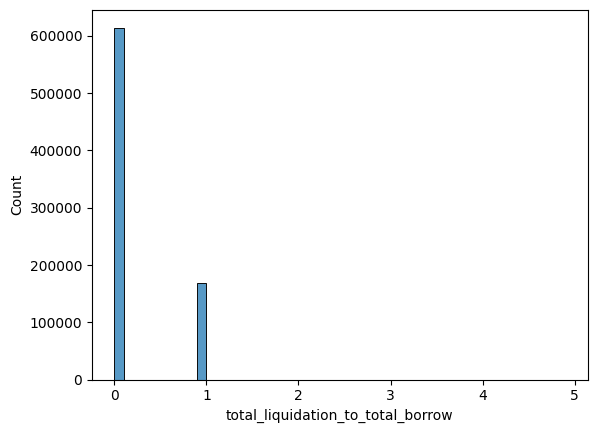

In [7]:
sns.histplot(liquidated, x="total_liquidation_to_total_borrow", bins=np.arange(0, 5, 0.1))
plt.show()

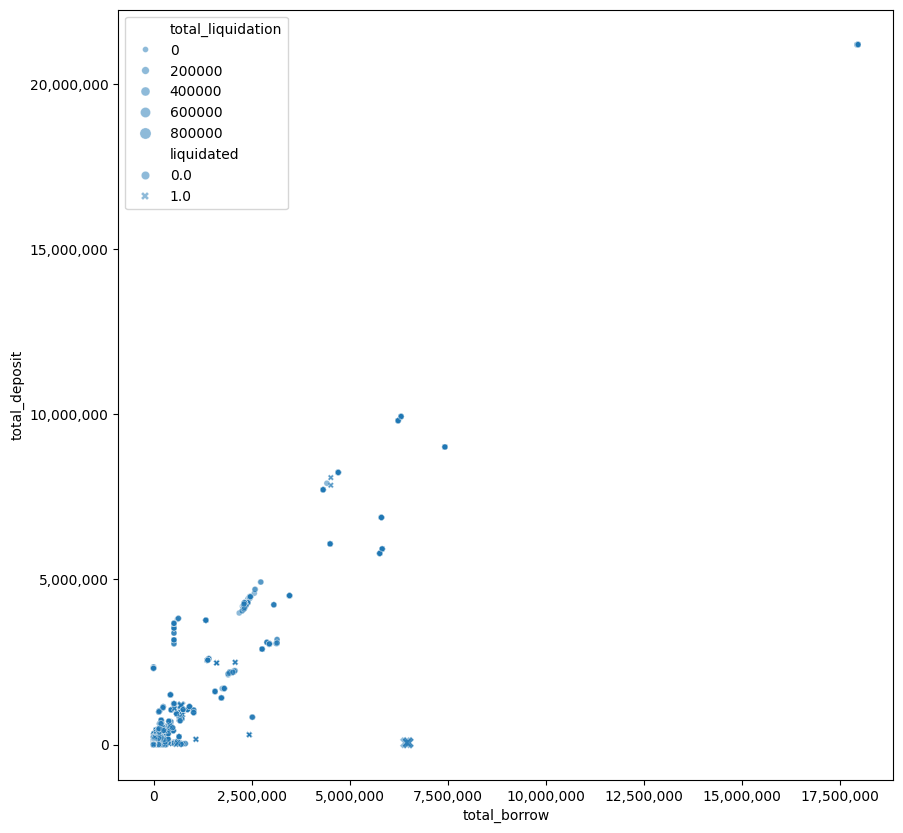

In [8]:
import matplotlib.ticker as ticker
plt.figure(figsize=(10, 10))
sns.scatterplot(df, x="total_borrow", y="total_deposit", size="total_liquidation", style="liquidated", alpha=0.5)
plt.gca().xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.show()

In [9]:
target = df["total_liquidation_to_total_borrow"]
target[target > 0].describe()

count    1.687800e+05
mean     6.134781e-01
std      4.255971e-01
min      2.307312e-10
25%      1.236188e-01
50%      8.185434e-01
75%      9.851904e-01
max      5.469605e+00
Name: total_liquidation_to_total_borrow, dtype: float64

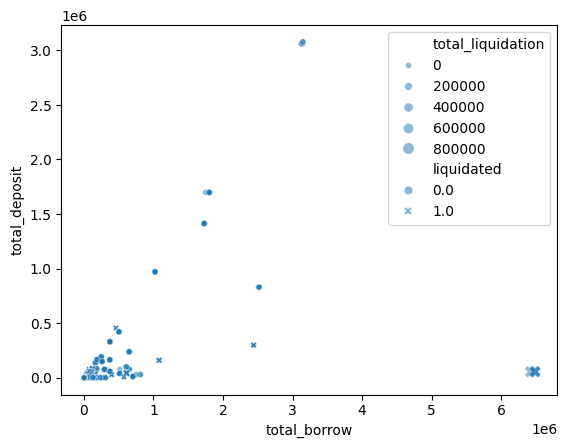

In [10]:
borrow_more_deposit = df.loc[df["total_borrow"] > df["total_deposit"], :]
sns.scatterplot(borrow_more_deposit, x="total_borrow", y="total_deposit", size="total_liquidation", style="liquidated", alpha=0.5)
plt.show()

In [11]:
totals = df.loc[:, ["total_deposit", "total_borrow", "total_liquidation", "total_repay", "total_liquidation_to_total_borrow"]]
totals = totals[~(totals["total_borrow"] > totals["total_deposit"])]
totals.describe()


,total_deposit,total_borrow,total_liquidation,total_repay,total_liquidation_to_total_borrow
count,7.540660e+05,7.540660e+05,754066.000000,7.540660e+05,754066.000000
mean,9.469286e+03,5.587773e+03,45.033002,5.124818e+03,0.132478
std,2.229299e+05,1.686970e+05,2390.832037,1.620434e+05,0.319474
min,5.975435e-07,1.000000e-12,0.000000,0.000000e+00,0.000000
25%,6.803883e-01,5.642111e-02,0.000000,0.000000e+00,0.000000
50%,9.046133e+00,1.219219e+00,0.000000,5.642147e-02,0.000000
75%,7.613739e+01,1.217932e+01,0.000000,6.621502e+00,0.000000
max,2.119206e+07,1.795176e+07,263354.794186,1.794177e+07,1.613273


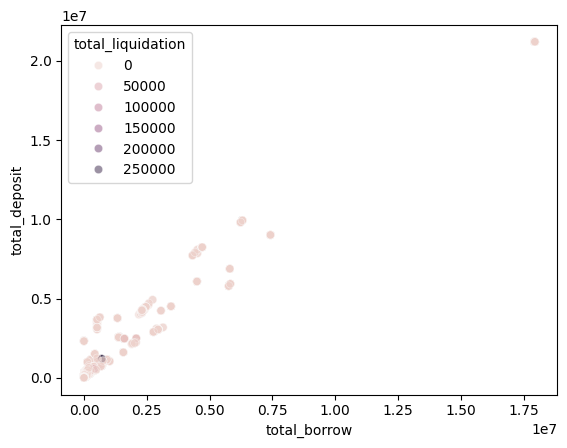

In [12]:
sns.scatterplot(totals, x="total_borrow", y="total_deposit", hue="total_liquidation", alpha=0.5)
plt.show()

In [13]:
add_agg = df.groupby("address")[["total_deposit", "total_borrow", "total_liquidation", "total_repay", ]].sum()
add_agg["total_liquidation_to_total_borrow"] = add_agg["total_liquidation"] / add_agg["total_borrow"]
add_agg.describe()

,total_deposit,total_borrow,total_liquidation,total_repay,total_liquidation_to_total_borrow
count,1.490500e+04,1.490500e+04,1.490500e+04,1.490500e+04,14905.000000
mean,4.962250e+05,3.170784e+05,2.830853e+03,2.917271e+05,0.129124
std,1.134359e+07,8.595313e+06,1.292224e+05,8.249914e+06,0.314644
min,0.000000e+00,5.580370e-11,0.000000e+00,0.000000e+00,0.000000
25%,4.194407e+01,3.992216e+00,0.000000e+00,0.000000e+00,0.000000
50%,5.040821e+02,9.462410e+01,0.000000e+00,6.801225e+00,0.000000
75%,4.366521e+03,9.611931e+02,0.000000e+00,5.440862e+02,0.000000
max,8.975613e+08,7.554302e+08,1.422116e+07,7.569295e+08,5.469605


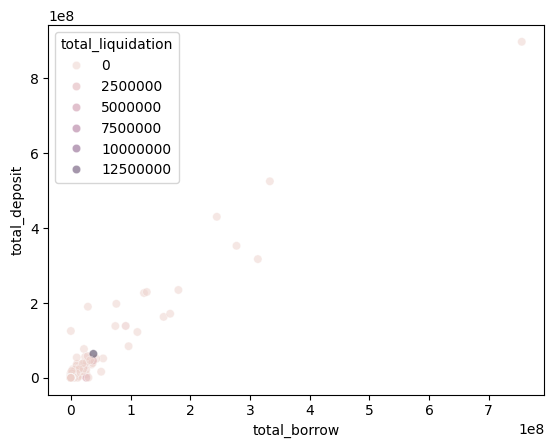

In [14]:
sns.scatterplot(add_agg, x="total_borrow", y="total_deposit", hue="total_liquidation", alpha=0.5)
plt.show()

In [15]:
df[df["address"].isin(["0x38a0c07f7288872eb759534af7514960a6fcc1a5"])]["liquidated"].value_counts()

liquidated
1.0    52
Name: count, dtype: int64

In [20]:
print(df.shape[0])
(df["total_liquidation_to_total_borrow"] > 0).sum()


783322


168780